# 1. linear regression
### 공부 시간에 따른 시험 점수


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/LinearRegressionData.csv')

In [ ]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [ ]:
X = dataset.iloc[:,:-1].values # 처음부터 마지막 컬럼 직전까지의 데이터 (독립변수 - 원인) .iloc[row:colum]
Y = dataset.iloc[:, -1].values # 마지막 컬럼 데이터 (종속 변수 - 결과)

In [ ]:
X, Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, Y) #fit == 학습 (모델 생성)

LinearRegression()

In [ ]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred # 예측되는 데이터

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

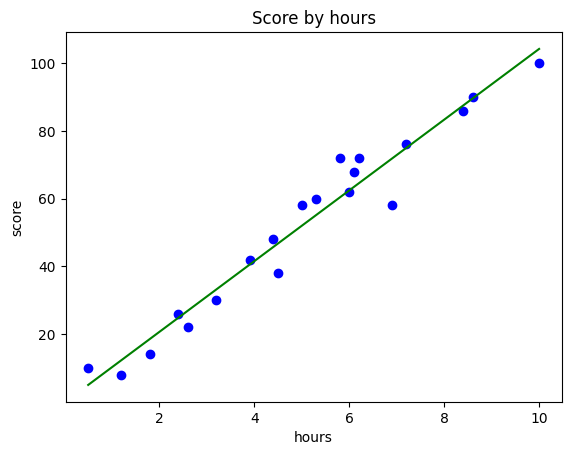

In [ ]:
plt.scatter(X, Y, color = 'blue') # 산점도
plt.plot(X, y_pred, color = 'green') # 선 그래프
plt.title('Score by hours') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [ ]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]])) # X는 2차원 배열이므로 [[입력 값]] 해준다 [9], [8], [7]


9시간 공부했을 때 예상 점수 :  [93.77478776 83.33109082 72.88739388]


In [ ]:
reg.coef_ # 기울기 (m)

array([10.44369694])

In [ ]:
reg.intercept_ #  y 절폅 (b)

-0.218484702867201

y = mx + b -> = y 10..4436x - 0.2184 --> x 는 구하려는 값

# 데이터 세트 분리

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/LinearRegressionData.csv')

In [3]:
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [7]:
X = dataset.iloc[:, :-1].values # 독립변수
y = dataset.iloc[:,-1].values # 종속변수

In [8]:
from numpy.random.mtrand import random
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.2, random_state = 0) # 훈련 80 : 테스트 20 으로 분리 

In [10]:
X, len(X) # 전체 데이터 X , 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [11]:
X_train, len(X_train) # 훈련세트 x, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [12]:
X_test, len(X_test) # 테스트 세트 X, 갸수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [13]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [14]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [15]:
y_test, len(y_test)

(array([ 90,   8, 100,  38]), 4)

### 분리된 데이터를 통한 모델링

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 회귀모델을 만들기위한 객체 생성

In [17]:
reg.fit(X_train, y_train) # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화(훈련 세트)

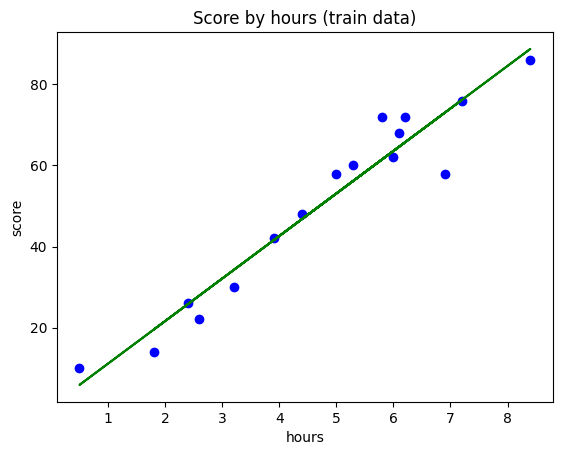

In [20]:
# 훈련데이터의 시각화
plt.scatter(X_train, y_train, color = 'blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color = 'green') # 선 그래프
plt.title('Score by hours (train data)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

### 데이터 시각화 (테스트 세트)

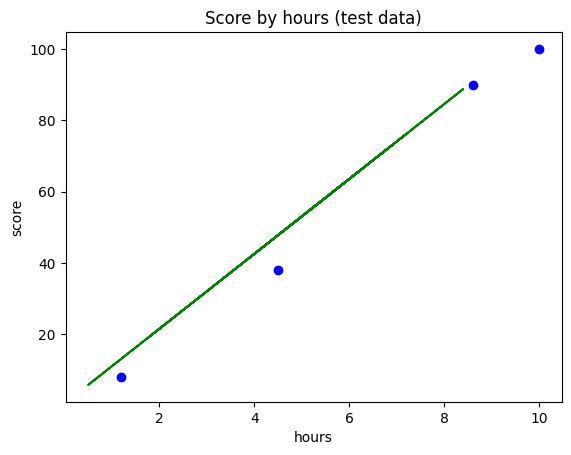

In [21]:
plt.scatter(X_test, y_test, color = 'blue') # 산점도 
plt.plot(X_train, reg.predict(X_train), color = 'green') # 선 그래프 -> 훈련 모델의 결과로 비교
plt.title('Score by hours (test data)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [22]:
reg.coef_ # 기울기

array([10.49161294])

In [23]:
reg.intercept_ # y절편

0.6115562905169369

### 모델 평가

In [24]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [26]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9356663661221668

## 경사 하강법 (Gradient Descent)

max_iter : 훈련 세트 반복 횟수 (Epoch 횟수)

eta0 = 학습률(learning rate)

In [38]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent 확률적 경사 하강법 
sr = SGDRegressor(max_iter = 100, eta0 = 0.0001, random_state = 0, verbose = 1)
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=100, random_state=0, verbose=1)

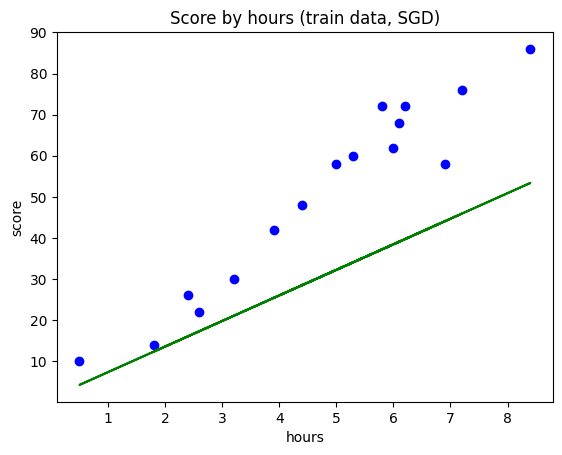

In [39]:
plt.scatter(X_train, y_train, color = 'blue') # 산점도 
plt.plot(X_train, sr.predict(X_train), color = 'green') # 선 그래프 -> 훈련 모델의 결과로 비교
plt.title('Score by hours (train data, SGD)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [29]:
sr.coef_, sr.intercept_

(array([10.32266065]), array([1.57925714]))

In [30]:
sr.score(X_test, y_test)

0.9719483040205751

In [31]:
sr.score(X_train, y_train)

0.9353694788494915